In [1]:
from IPython.display import Image

import pandas as pd
pd.set_option("display.max_columns", None)

# 🗂 <font color="brown">Classification</font>

---

PyCaret의  **Classification Module**은 관측치들을 그룹으로 분류하는 데 사용되는 지도 학습 모듈이다.

Classification Module의 목표는 이산적(discrete)이고 순서가 정해져 있지 않은(unordered) 범주형 클래스 레이블을 예측하는 것이다.

일반적인 사용 사례로는 고객 응답 예측(예 또는 아니요), 고객 이탈 예측(고객 이탈 또는 잔류), 질병 예측(긍정 또는 부정) 등이 있다.

해당 모듈은 이진 분류 혹인 다중 분류 문제에 사용할 수 있다.

<a href = "https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment">`setup`</a> 함수를 통해 모델링을 위해 데이터를 준비하는 몇 가지<a href = "https://pycaret.gitbook.io/docs/get-started/preprocessing">`전처리`</a>기능을 제공한다.

18개 이상의 즉시 사용할 수 있는 알고리즘과 훈련된 모델의 성능을 분석하기 위한 몇 가지 플롯이 있다.

## ⚒ <font color="orange">Setup</font>

`setup` 함수는 학습 환경을 초기화시키고 변환 파이프라인(transformation pipeline)을 만든다.

`setup` 함수는 다른 함수를 실행하기 전에 반드시 호출해야 한다.

**data**와 **target** 2개의 파라미터는 필수적으로 필요하며, 다른 파라미터들은 선택사항이다.

In [2]:
# 필요 라이브러리 불러오기
from pycaret.datasets import get_data

In [3]:
# 데이터 불러오기
data = get_data("diabetes", verbose = True)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- **pycaret.datasets** 모듈의 `get_data` 함수는 git 저장소에 있는 데이터를 불러오는 함수이다.

- `verbose = True`를 설정하면 데이터를 가져온 후, 데이터의 일부를 보여준다. 만약, 데이터의 일부를 보기 싫다면 **False** 인자를 입력해주면 된다.

In [4]:
# 필요 라이브러리 불러오기
from pycaret.classification import *

In [5]:
# 'setup' 함수 사용
s = setup(data = data, target = "Class variable", session_id = 1025)

,Description,Value
0,session_id,1025
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,0
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,0
9,High Cardinality Features,0


**setup** 함수가 실행되면, PyCaret의 inference algorithm은 특정 속성을 기반으로 모든 데이터의 유형을 자동으로 추론한다.

데이터의 유형을 정확하게 추론해야 하지만 때때로 맞지 않는 경우도 존재한다.

정확하게 추론하기 위해 PyCaret에서 데이터 유형 확인을 요청하는 아래와 같이 프롬프트를 표시한다.

만약 데이터의 유형이 모두 정확하면 엔터를 누르면 되고, 그렇지 않다면 `quit`를 입력하면 setup 함수가 종료된다.

- `session_id` 파라미터는 scikit-learn의 **random_state**와 같은 역할을 한다.

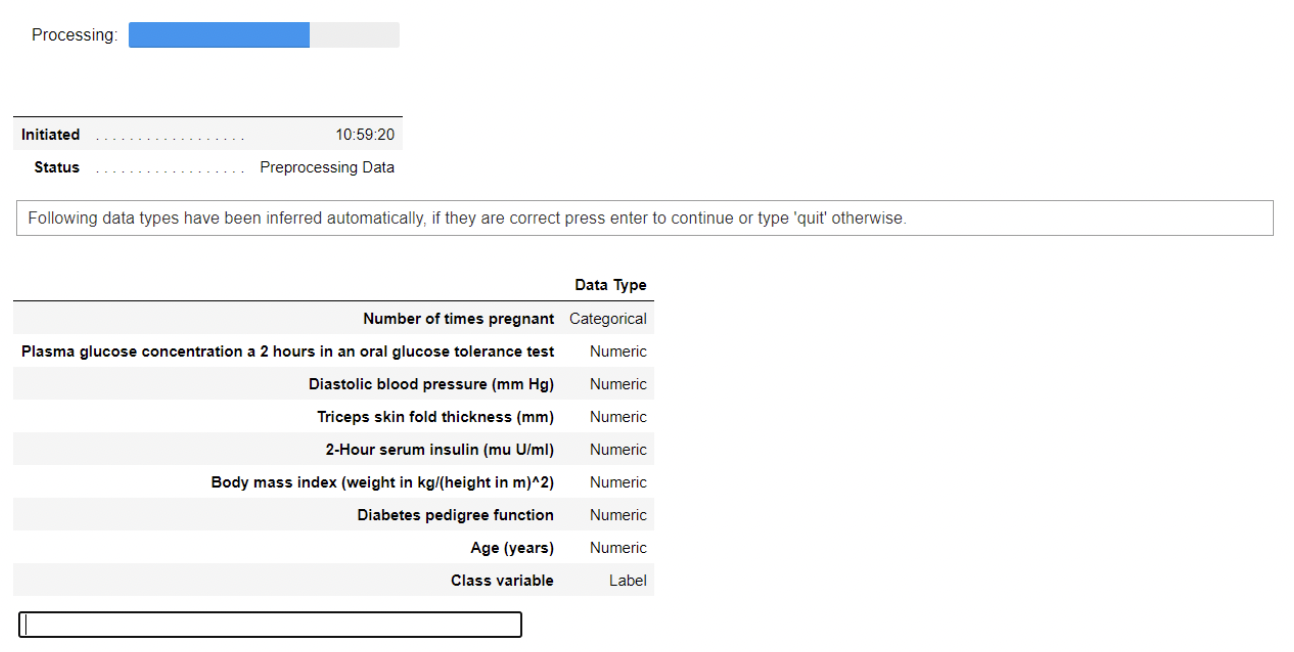

In [16]:
display(Image("./Images/Setup.png", width = 700))

PyCaret의 기계 학습 모델은 여러 유형의 사전처리 작업을 자동으로 수행하기 때문에 데이터 유형이 올바른지 확인하는 것은 매우 중요하다.

또는 **setup** 함수에서 `numeric_features`와 `categorical_features` 파라미터를 사용하여 데이터 유형을 사전에 정의할 수 있다.

## ⚒ <font color="orange">Compare Models</font>

`compare_models()` 함수는 교차검증을 사용하여 모델 라이브러리에서 사용할 수 있는 모든 estimators의 성능을 평가하고 학습한다.

이 함수의 결과값은 교차검증된 결과를 평균하여 반환한다.

교차검증 중에 평가된 항목들은 `get_metrics` 함수를 사용하여 접근할 수 있다.

또한, `add_metric`와 `remove_metric` 함수를 사용하여 사용자가 지정한 평가 항목을 추가하거나 삭제할 수 있다.

In [8]:
# 'compare_models()' 함수 사용
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7596,0.7987,0.5737,0.6976,0.6264,0.4523,0.4590,0.0320
lda,Linear Discriminant Analysis,0.7539,0.7921,0.5526,0.6940,0.6133,0.4365,0.4438,0.0040
ridge,Ridge Classifier,0.7521,0.0000,0.5526,0.6889,0.6119,0.4331,0.4397,0.0020
ada,Ada Boost Classifier,0.7318,0.7852,0.5632,0.6434,0.5924,0.3960,0.4028,0.0160
rf,Random Forest Classifier,0.7281,0.7866,0.5316,0.6429,0.5787,0.3813,0.3873,0.0520
et,Extra Trees Classifier,0.7279,0.7743,0.5263,0.6485,0.5732,0.3786,0.3885,0.0460
gbc,Gradient Boosting Classifier,0.7261,0.7965,0.5947,0.6205,0.6028,0.3953,0.3985,0.0220
lightgbm,Light Gradient Boosting Machine,0.7019,0.7692,0.5421,0.5918,0.5595,0.3368,0.3418,0.0070
knn,K Neighbors Classifier,0.6963,0.7391,0.5105,0.5963,0.5448,0.3191,0.3252,0.0050
nb,Naive Bayes,0.6628,0.7119,0.1316,0.5750,0.2123,0.1028,0.1439,0.0030


- 위 표의 출력 결과는 **Accuracy** 기준 내림차순으로 출력된다.

- 현재 데이터에 여러 모델을 적용하였을 때, 가장 결과가 좋은 모델은 **Logistic Regression**이다.

In [11]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1025, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## ⚒ <font color="orange">Analyze Model</font>

`evaluate_model` 함수는 테스트 데이터에서 훈련된 모델의 성능을 분석한다.

경우에 따라서는 모델을 다시 설정해야 할 수 있다.

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

`evaluate_model()` 함수는 Jupyter Notebook 혹은 이와 동일한 환경에서만 작동한다.

모델에 사용된 Hyperparameters, AUC, Confusion Matrix 등을 손쉽게 확인할 수 있다.

또한, `plot_model()` 함수를 사용하여 개별적으로 시각화할 수 있다.

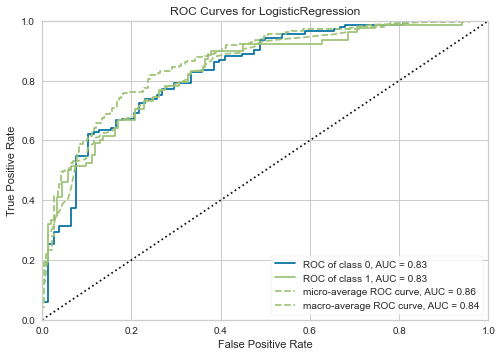

In [15]:
plot_model(best, plot = "auc")

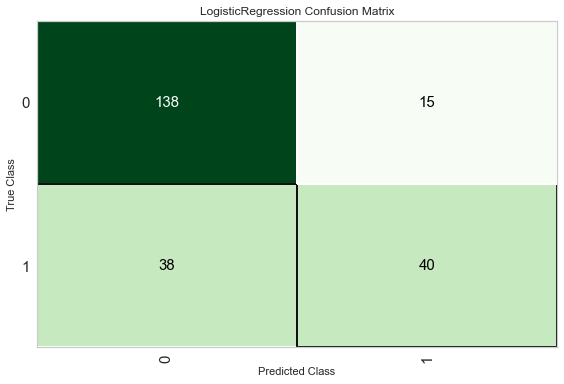

In [16]:
plot_model(best, plot = "confusion_matrix")

- Confusion Matrix의 결과를 보면, 0인 클래스는 잘 분류하는 것으로 보이지만 1인 클래스는 분류를 잘 못하고 있음을 확인할 수 있다.

## ⚒ <font color="orange">Predictions</font>

`predict_model()` 함수는 훈련된 모델을 사용하여 **Label**과 **Score (probability of predicted class)** 라는 새로운 변수를 생성하여 예측한다.

`data` 매개변수에 값이 입력되어 있지 않는 경우에는, **setup** 함수 생성 시 만들어졌던 테스트 데이터를 예측한다.

`predict_model()` 함수의 반환값은 **Label**과 **Score** 변수를 포함하고 있는 데이터프레임이다.

- **setup** 함수 생성 시 만들어졌던 테스트 데이터를 예측하는 경우에는 사용된 모델과 Accuracy, AUC, Recall 등의 평가 항목들을 자동으로 반환한다.

- 그 외의 경우에는 평가 항목들을 자동으로 반환하지 않는다.

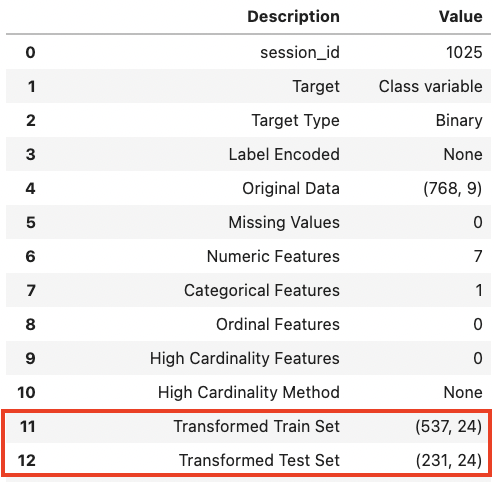

In [40]:
display(Image("./Images/Setup 함수 일부.png", width = 300, height = 600))

- **setup** 함수를 통해 생성된 학습 데이터의 개수는 537개 이며, 테스트 데이터의 개수는 231개이다.

In [43]:
# 'setup' 함수 생성 시, 만들어졌던 테스트 데이터를 사용하여 예측
predict_setup = predict_model(estimator = best)

# 'predict_model()' 함수 반환값 출력
print("\nShape of predict_model dataframe :", predict_setup.shape, "\n")
display(predict_setup.head(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7706,0.8341,0.5128,0.7273,0.6015,0.4471,0.4605



Shape of predict_model dataframe : (231, 27) 



,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,Number of times pregnant_11,Number of times pregnant_12,Number of times pregnant_13,Number of times pregnant_14,Number of times pregnant_15,Number of times pregnant_17,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,168.0,64.0,0.0,0.0,32.900002,0.135,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.7318
1,123.0,88.0,37.0,0.0,35.200001,0.197,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7762
2,141.0,58.0,34.0,128.0,25.400000,0.699,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8321
3,57.0,60.0,0.0,0.0,21.700001,0.735,67.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9576
4,129.0,76.0,28.0,122.0,35.900002,0.280,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5282
5,101.0,58.0,17.0,265.0,24.200001,0.614,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9592
6,100.0,74.0,12.0,46.0,19.500000,0.149,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9674
7,100.0,74.0,40.0,215.0,39.400002,0.661,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.5577
8,117.0,66.0,31.0,188.0,30.799999,0.493,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8353
9,98.0,58.0,33.0,190.0,34.000000,0.430,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.6799


- `data` 매개변수에 인자가 주어지지 않았을 때는 자동으로 테스트 데이터를 예측한 결과를 확인할 수 있다.

- 다음으로 `data` 매개변수에 인자를 주고 결과를 확인해보도록 한다.

In [45]:
# 'data' 매개변수에 인자가 주어졌을 때
predict_data = predict_model(best, data = data)

print("Shape of predict_model dataframe :", predict_data.shape, "\n")
display(predict_data.head(10))

Shape of predict_model dataframe : (768, 11) 



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.7122
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9415
2,8,183,64,0,0,23.3,0.672,32,1,1,0.6815
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9488
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8627
5,5,116,74,0,0,25.6,0.201,30,0,0,0.8268
6,3,78,50,32,88,31.0,0.248,26,1,0,0.8630
7,10,115,0,0,0,35.3,0.134,29,0,1,0.6403
8,2,197,70,45,543,30.5,0.158,53,1,1,0.5681
9,8,125,96,0,0,0.0,0.232,54,1,0,0.9706


- **여기서 주의할 점은 `Score` 변수가 의미하는 것은 해당 클래스가 예측될 확률이다.**

- **즉, 위의 첫번째 데이터 Label 값은 1이고 Score 값은 0.7122 인데, 이것의 의미는 1이 나올 확률이 71% 라는 것이다.**

- 만약 각 관측치의 모든 클래스가 예측될 확률을 보고 싶은 경우에는 `raw_score = True`로 지정해주면 된다.

In [46]:
predict = predict_model(best, data = data, raw_score = True)
display(predict.head())

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score_0,Score_1
0,6,148,72,35,0,33.6,0.627,50,1,1,0.2878,0.7122
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9415,0.0585
2,8,183,64,0,0,23.3,0.672,32,1,1,0.3185,0.6815
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9488,0.0512
4,0,137,40,35,168,43.1,2.288,33,1,1,0.1373,0.8627


In [24]:
predict_model(best, data = data)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.7122
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9415
2,8,183,64,0,0,23.3,0.672,32,1,1,0.6815
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9488
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8627
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.6443
764,2,122,70,27,0,36.8,0.340,27,0,0,0.7973
765,5,121,72,23,112,26.2,0.245,30,0,0,0.7887
766,1,126,60,0,0,30.1,0.349,47,1,0,0.7161


# 📈 <font color="brown">Regression</font>

---

PyCaret **Regression Module**은 하나 혹은 그 이상의 **독립변수**와 **종속변수**와의 관계를 추정하는데 사용되는 지도학습 모듈이다.

회귀의 목적은 연속적인 값을 예측하는 것이다.(판매가격 예측, 수량 예측, 기온 예측 등)

Classification Module과 마찬가지로 <a href = "https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment">`setup`</a> 함수를 통해 모델링을 위해 데이터를 준비하는 몇 가지 <a href = "https://pycaret.gitbook.io/docs/get-started/preprocessing">`전처리`</a>기능을 제공한다.

25개 이상의 즉시 사용할 수 있는 알고리즘과 훈련된 모델의 성능을 분석하기 위한 몇 가지 <a href="https://pycaret.gitbook.io/docs/get-started/functions#plot-model">`플롯`</a>이 있다.

## ⚒ <font color="orange">Setup</font>

`setup` 함수는 Classification Module과 동일하며, 마찬가지로 **data**와 **target** 2개의 파라미터는 필수적으로 필요하다.

나머지 다른 파라미터들은 선택사항이다.

In [5]:
# 필요 라이브러리 불러오기
from pycaret.datasets import get_data

In [7]:
# 데이터 불러오기
data = get_data("insurance", verbose = True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- 회귀 모듈에 사용하고자 하는 데이터에서 문자형 타입을 가진 변수(sex, region)가 존재하는 것을 확인할 수 있다.

- PyCaret의 장점은 위와 같이 문자형 타입의 변수를 따로 처리해줘야 할 필요성이 없다는 것이다.

In [8]:
# 필요 라이브러리 불러오기
from pycaret.regression import *

In [15]:
# 'setup' 함수 사용
s = setup(data = data, target = "charges", session_id = 1025)

,Description,Value
0,session_id,1025
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,0
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


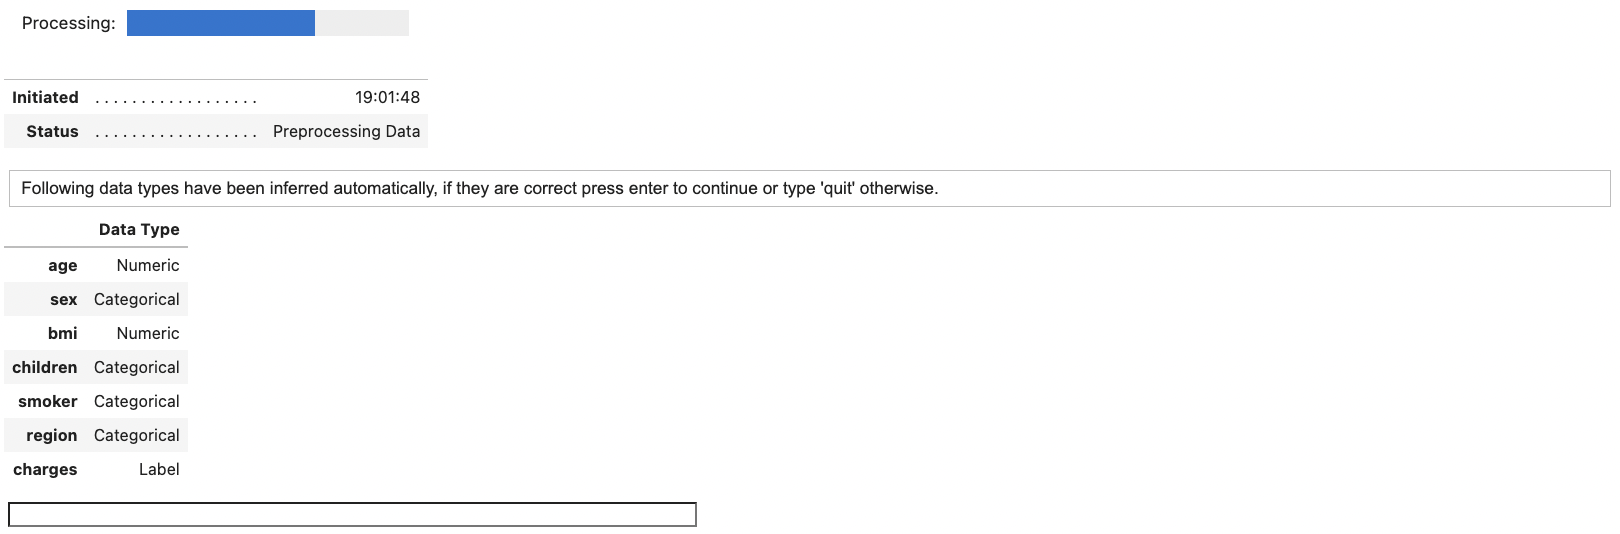

In [14]:
display(Image("./Images/Regression Setup.png", width = 700))

- 위의 사진처럼 PyCaret은 변수들의 타입을 자동으로 추적한다.

- 현재 과정에서 **children** 변수도 Categorical 타입으로 추적이 된 것을 볼 수 있는데 우선은 넘어가도록 한다.

- 만약 수정하고자 하는 경우에는 `numeric_features`와 `categorical_features` 매개변수를 사용하면 된다.

## ⚒ <font color="orange">Compare Models</font>

- 위의 Classification Module과 똑같기 떄문에 생략하도록 한다.

In [16]:
# 'compare_models()' 함수 사용
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2518.7576,22083864.9465,4625.3804,0.8554,0.4217,0.2767,0.0170
lightgbm,Light Gradient Boosting Machine,2827.5821,23477749.1462,4787.4895,0.8462,0.5058,0.3453,0.0110
rf,Random Forest Regressor,2699.7280,23688478.6681,4806.2414,0.8451,0.4494,0.3123,0.0600
et,Extra Trees Regressor,2666.9759,27007028.4284,5135.1952,0.8228,0.4653,0.3041,0.0550
ada,AdaBoost Regressor,4435.8966,28941183.4714,5341.8974,0.8102,0.6581,0.7930,0.0090
llar,Lasso Least Angle Regression,4399.9979,38305150.8682,6136.2662,0.7504,0.5712,0.4418,0.0050
ridge,Ridge Regression,4419.1223,38331786.4000,6138.9798,0.7502,0.5702,0.4451,0.0030
lasso,Lasso Regression,4408.2232,38342982.8000,6138.9506,0.7501,0.5820,0.4433,0.0040
br,Bayesian Ridge,4416.9376,38337944.6151,6139.2647,0.7501,0.5720,0.4447,0.0040
lr,Linear Regression,4408.8551,38346646.0000,6139.2482,0.7500,0.5856,0.4434,0.2400


- Regression Module에서는 $R^2$를 기준으로 내림차순 정렬이다.

- 현재 데이터에 여러 모델을 적용했을 때, 가장 최적의 모델은 **Gradient Boosting Regressor Model**이다.

In [18]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1025, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


## ⚒ <font color="orange">Analyze Model</font>

`evaluate_model()` 함수는 훈련된 모델에 테스트 데이터를 사용하여 성능을 확인한다.

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

- **evaluate_model** 함수를 사용하여 전체적인 성능을 한 눈에 확인할 수 있다.

- 위의 방법 대신 `plot_model` 함수를 사용하여 개별적으로 확인할 수 있다.

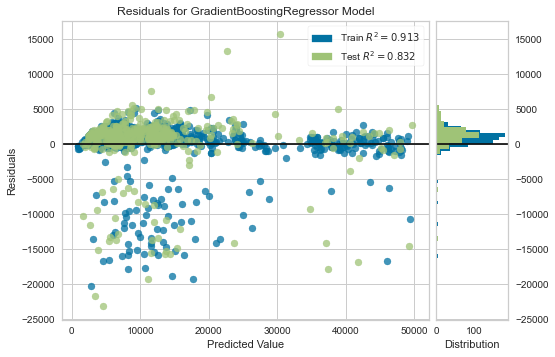

In [20]:
plot_model(best, plot = "residuals")

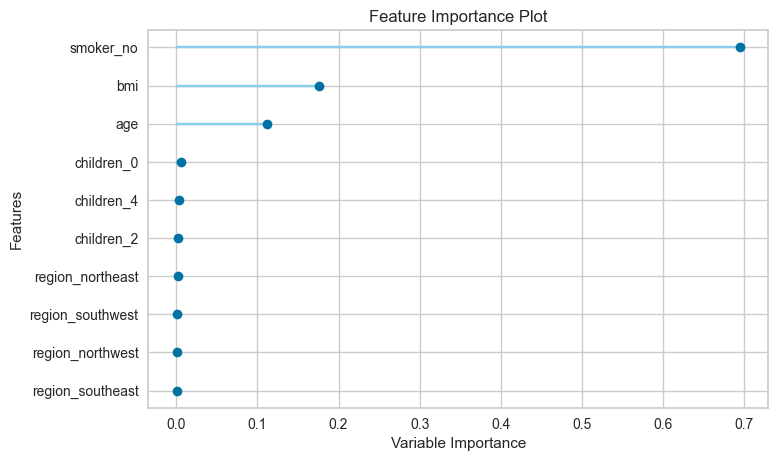

In [23]:
plot_model(best, plot = "feature")

## ⚒ <font color="orange">Predictions</font>

Regression Module에서의 `predict_model()` 함수는 Classification Module과 다르게 훈련된 모델을 사용하여 `Lable` 이라는 새로운 변수만 생성하여 예측한다.

`data` 매개변수에 값이 입력되어 있지 않는 경우에는, 마찬가지로 **setup** 함수 생성 시 만들어졌던 테스트 데이터를 예측한다.

In [24]:
# 'setup' 함수 생성 시, 만들어졌던 테스트 데이터를 사용하여 예측
predict_setup = predict_model(estimator = best)

# 'predict_model()' 함수 반환값 출력
print("\nShape of predict_model dataframe :", predict_setup.shape, "\n")
display(predict_setup.head(10))

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2683.3066,20697950.4141,4549.5000,0.8320,0.4409,0.3396



Shape of predict_model dataframe : (402, 16) 



,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,31.0,25.900000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19199.943359,18218.275227
1,55.0,40.810001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12485.800781,13391.724017
2,51.0,22.420000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9361.327148,22729.434488
3,36.0,26.885000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5267.818359,5764.938578
4,47.0,29.830000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9620.331055,10133.694231
5,38.0,37.730000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5397.616699,5734.998568
6,56.0,34.430000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10594.225586,12171.177591
7,35.0,34.320000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5934.379883,6992.292891
8,50.0,26.410000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8827.209961,10133.061636
9,42.0,40.369999,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43896.375000,41894.007470


In [25]:
# 'data' 매개변수에 인자가 주어졌을 때
predict_data = predict_model(best, data = data)

print("Shape of predict_model dataframe :", predict_data.shape, "\n")
display(predict_data.head(10))

Shape of predict_model dataframe : (1338, 8) 



,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,17473.550731
1,18,male,33.770,1,no,southeast,1725.55230,2892.204664
2,28,male,33.000,3,no,southeast,4449.46200,5764.551987
3,33,male,22.705,0,no,northwest,21984.47061,5481.907725
4,32,male,28.880,0,no,northwest,3866.85520,3596.271817
5,31,female,25.740,0,no,southeast,3756.62160,3777.389220
6,46,female,33.440,1,no,southeast,8240.58960,9715.640095
7,37,female,27.740,3,no,northwest,7281.50560,7307.313617
8,37,male,29.830,2,no,northeast,6406.41070,8374.008924
9,60,female,25.840,0,no,northwest,28923.13692,13740.914692


# 🍭 <font color="brown">Clustering</font>

---

PyCaret **Clustering Module**은 동일한 그룹의 개체가 다른 그룹의 개체보다 서로 더 유사하도록 그룹화하는 작업을 수행하는 비지도학습 모듈이다.

마찬가지로 `setup` 함수를 통해 모델링을 위해 데이터를 준비하는 몇 가지 `전처리` 기능을 제공한다.

10개 이상의 즉시 사용할 수 있는 알고리즘과 훈련된 모델의 성능을 분석하기 위한 몇 가지 플롯이 있다.

## ⚒ <font color="orange">Setup</font>

`setup()` 함수는 학습 환경을 초기화시키고 변환 파이프라인(transformation pipeline)을 만든다.

또한, 다른 함수를 실행하기 전에 **setup()** 함수는 반드시 선언되어야 한다.

Classification, Regression과는 다르게 `data` 매개변수만 입력해주면 되며, 다른 매개변수들은 선택사항이다.

In [26]:
# 필요 라이브러리 불러오기
from pycaret.datasets import get_data

In [28]:
# 데이터 불러오기
data = get_data("jewellery")

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [29]:
# 필요 라이브러리 불러오기
from pycaret.clustering import *

In [38]:
# 'setup()' 함수 사용
s = setup(data = data, normalize = True, session_id = 1025)

,Description,Value
0,session_id,1025
1,Original Data,"(505, 4)"
2,Missing Values,0
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,0
6,High Cardinality Features,0
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


- 군집분석은 거리 기반으로 군집을 생성하기 때문에 변수들의 단위 일치가 매우 중요하다.

- 따라서 현재 과정에서는 **`normalize = True`** 로 지정해주었다.

- 군집분석에서는 학습 데이터와 테스트 데이터를 나누는 과정이 없다.

## ⚒ <font color="orange">Create Model</font>

위의 모듈들과 다르게 Clustering Module에서는 **compare_models()** 함수 대신 **`create_model()`** 함수를 사용한다.

**create_model()** 함수는 입력된 모델을 가지고 학습하고 평가해주는 함수이다.

평가된 항목들은 `get_metrics` 함수를 통해 접근할 수 있다.

`add_metric`와 `remove_metric` 함수를 통해 사용자가 필요한 항목들을 추가하거나 삭제할 수 있다.

사용가능한 모든 모델을 확인하려면 `models` 함수를 사용하면 된다.

In [39]:
# 사용가능 모델 확인
display(models())

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


- 위의 모델들 중에서 **K-Means** 모델을 사용하도록 한다.

In [43]:
# 'create_model()' 함수 사용
kmeans = create_model("kmeans", num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2649,0.3743,0,0,0


- Clustering Module에서 **create_model** 함수를 사용하면 기본값으로 군집의 개수는 4이다.

- `num_clusters` 매개변수를 사용하여 군집의 개수를 지정해줄 수 있다.

## ⚒ <font color="orange">Analyze Model</font>

`evalute_model()` 함수를 학습된 모델의 성능을 분석할 수 있다.

In [44]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

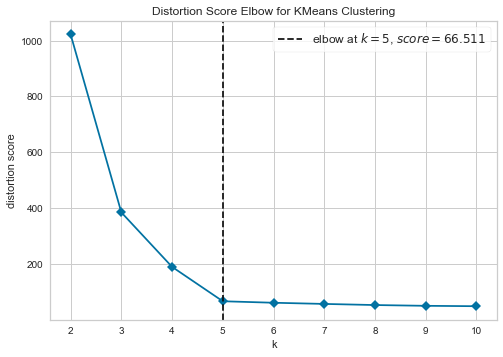

In [46]:
plot_model(kmeans, plot = "elbow")

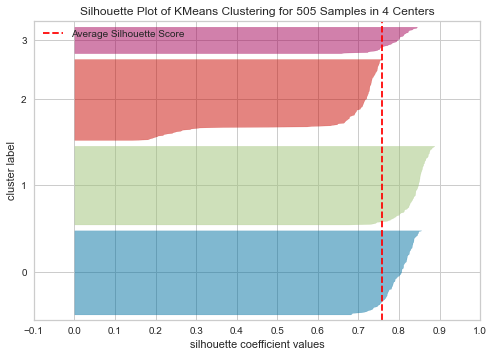

In [47]:
plot_model(kmeans, plot = "silhouette")

## ⚒ <font color="orange">Assign Model</font>

`assign_model()` 함수는 학습된 모델을 가지고 학습 데이터에 군집 라벨을 생성한다.

In [50]:
# 'assign_model()' 함수 사용
result = assign_model(kmeans)

print("Shape of result data :", result.shape, "\n")
display(result.head())

Shape of result data : (505, 5) 



,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 0
1,59,81799,0.791082,5417.661426,Cluster 0
2,62,74751,0.702657,9258.992965,Cluster 0
3,59,74373,0.765680,7346.334504,Cluster 0
4,87,17760,0.348778,16869.507130,Cluster 1


## ⚒ <font color="orange">Predictions</font>

`predict_model()` 함수는 학습된 모델을 통해 새로운 데이터에 **Cluster** 라는 새로운 변수를 생성하여 예측한다.

현재 과정에서는 새로운 데이터가 없기 때문에 기존에 불러왔던 데이터를 사용한다.

In [52]:
# 'predict_model()' 함수 사용
predictions = predict_model(kmeans, data = data)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.829923,Cluster 0
1,59,81799,0.791082,5417.661426,Cluster 0
2,62,74751,0.702657,9258.992965,Cluster 0
3,59,74373,0.765680,7346.334504,Cluster 0
4,87,17760,0.348778,16869.507130,Cluster 1


# 📡 <font color="brown">Anomaly Detection</font>

---

PyCaret **Anomaly Detection Module**은 다수의 데이터와 유의하게 다른 희귀 항목, 이벤트 혹은 관측치들을 식별하는데 사용되는 비지도학습 모듈이다.

일반적으로, 변칙적인 항목들은 은행 사기, 구조적 결함, 의료 문제 또는 오류와 같은 문제로 해석된다.

마찬가지로 `setup` 함수를 통해 모델링을 위한 데이터를 준비하는 몇 가지 `전처리` 기능을 제공한다.

10개 이상의 즉시 사용할 수 있는 알고리즘과 훈련된 모델의 성능을 분석하기 위한 몇 가지 플롯이 있다.

## ⚒ <font color="orange">Setup</font>

**Anomaly Detection**의 **setup()** 함수도 Clustering Module 처럼 `data` 한 개의 매개변수만 값을 입력해주면 된다.

In [53]:
# 필요 라이브러리 불러오기
from pycaret.datasets import get_data

In [54]:
# 데이터 불러오기
data = get_data("anomaly")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [55]:
# 필요 라이브러리 불러오기
from pycaret.anomaly import *

In [57]:
# 'setup()' 함수 사용
s = setup(data = data, session_id = 1025)

,Description,Value
0,session_id,1025
1,Original Data,"(1000, 10)"
2,Missing Values,0
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,0
6,High Cardinality Features,0
7,High Cardinality Method,None
8,Transformed Data,"(1000, 10)"
9,CPU Jobs,-1


## ⚒ <font color="orange">Create Model</font>

Clustering Module과 마찬가지로 **compare_models()** 함수 대신 **`create_model()`** 함수를 사용한다.

사용가능한 모든 모델을 확인하려면 `models()` 함수를 사용하면 된다.

In [59]:
display(models())

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


- 사용가능한 모델이 총 12개이며, **Isolation Forest** 모델을 사용하도록 한다.

In [61]:
iforest = create_model("iforest")
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1025, verbose=0)

## ⚒ <font color="orange">Analyze Model</font>

In [63]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

- Anomaly Detection 모듈의 `evaluate_model()` 함수는 모델의 성능을 분석하기 위해 2가지 기능을 제공한다.

- 위의 그래프를 `plot_model()` 함수를 사용하여 개별적으로 불러올 수 있다.

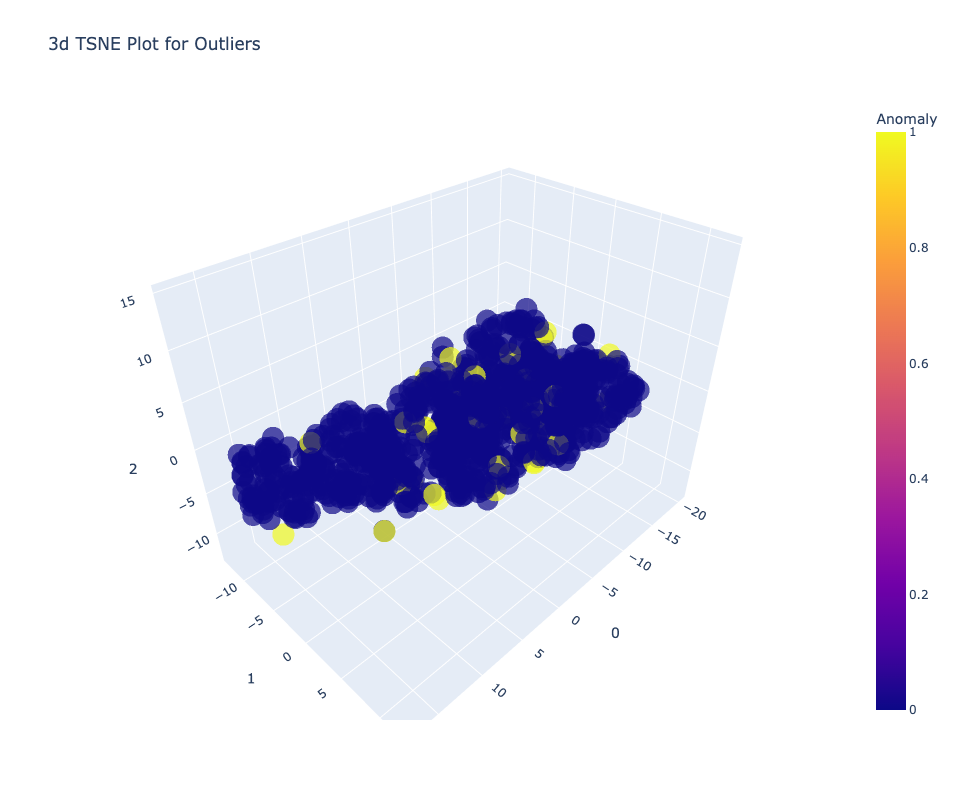

In [64]:
plot_model(iforest, plot = "tsne")

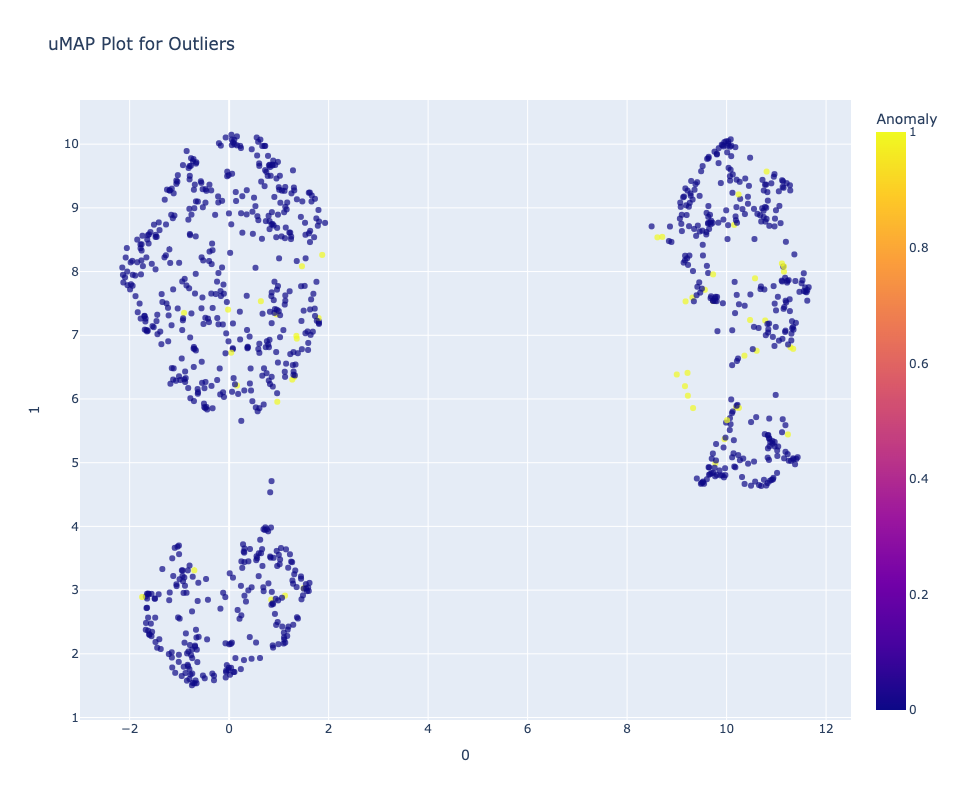

In [65]:
plot_model(iforest, plot = "umap")

- 위의 두 그래프에서 노란색에 가까운 관측치들이 이상치 데이터를 나타낸다.

## ⚒ <font color="orange">Assign Model</font>

`assign_model()` 함수는 주어진 모델을 통해 이상치 라벨을 부여한다.

1로 주어지면 이상치를 의미하고, 0이면 이상치가 아님을 의미한다.

In [71]:
# 'assign_model()' 함수 사용
result = assign_model(iforest)

print("Shape of result data :", result.shape, "\n")
print("Number of Outlier observations :", len(result[result["Anomaly"] == 1]), "\n")
print("Number of Not Outlier observations :", len(result[result["Anomaly"] == 0]), "\n")

display(result.head())

Shape of result data : (1000, 12) 

Number of Outlier observations : 50 

Number of Not Outlier observations : 950 



,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.016738
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.086196
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.036670
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.062398
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.032718


- **Isolation Forest** 모델을 통해 식별된 이상치의 개수는 50개 이다.

- `assign_model()` 함수를 사용하면 이상치 여부를 알려주는 **Anomaly** 변수도 생성해주지만, **Anomaly_Score** 변수도 생성해준다.

## ⚒ <font color="orange">Predictions</font>

`predict_model()` 함수는 훈련된 모델을 사용하여 새로운 데이터에 이상치 여부를 나타내는 변수를 생성한다.

In [73]:
# 'predict_model()' 함수 사용
predictions = predict_model(iforest, data = data)

display(predictions.head())

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.016738
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.086196
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.036670
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.062398
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.032718


- **Classification, Regression, Clustering, Anomaly Detection** 외에도 다른 기능들을 제공하지만, 4개의 기능에 대해서만 알아보도록 한다.

- [PyCaret 공식 홈페이지](https://pycaret.org/)